# Project Cancer Detection

## Mini Project using Breast Cancer Wisconsin (Disgnostic) Data Set

[Source: UCI](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)
[Data Set info](http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names)

In [2]:
import numpy as np
import pandas as pd

In [3]:
col = ['id', 'Clump Thickness', 'Uniformity of Cell Size', 
       'Uniformity of Cell Shape', 'Marginal Adhesion', 
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class']
df = pd.read_csv("breast-cancer-wisconsin.data.csv", names=col,
                 header=None)
df.head(6)

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 57.4+ KB


# Data Preprocessing Phase

In [5]:
df['Bare Nuclei'].describe()

count     699
unique     11
top         1
freq      402
Name: Bare Nuclei, dtype: object

In [6]:
df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [7]:
df[df['Bare Nuclei'] == "?"]

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [8]:
df['Bare Nuclei'].replace("?", np.NAN, inplace=True)
df = df.dropna()

In [9]:
df[df['Bare Nuclei'] == "?"]

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class


In [10]:
df['Class'] = df['Class'] / 2 - 1

In [11]:
df['Class'].value_counts()

0.0    444
1.0    239
Name: Class, dtype: int64

In [12]:
X = df.drop(['id', 'Class'], axis=1)
X_col = X.columns

In [13]:
y = df['Class']

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
X = StandardScaler().fit_transform(X.values)

C:\Users\desktop\Anaconda3\envs\purushotham\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df1 = pd.DataFrame(X, columns=X_col)

In [18]:
df1.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484


#  Training Data To Fit The Model

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df1, y,
                                                    train_size=0.8,
                                                    random_state=42)

C:\Users\desktop\Anaconda3\envs\purushotham\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


# Finding the best K-Value For The Model

In [21]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0,0.5,'Testing Accuracy')

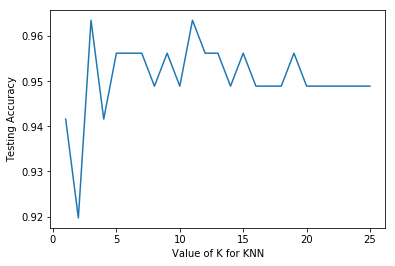

In [22]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [23]:
max_y = max(scores)  # Find the maximum y value
max_x = k_range[scores.index(max_y)]  # Find the x value corresponding to the maximum y value
print (max_x)
print (max_y)

3
0.9635036496350365


# Testing Phase

In [40]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred) * 100 )

96.35036496350365


# Cross Validation: Find the best K value

In [25]:
from sklearn.cross_validation import cross_val_score

C:\Users\desktop\Anaconda3\envs\purushotham\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, df1, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9489763458920232, 0.941644717588528, 0.9606338512043363, 0.9621263885177693, 0.9693940782023386, 0.9664742146047256, 0.9694373401534527, 0.9708866155157715, 0.9679454390451834, 0.9650468883205455, 0.9694373401534527, 0.967988064791134, 0.9708866155157715, 0.966538789428815, 0.9650249392424068, 0.965068201193521, 0.9679448028400198, 0.9635756638800881, 0.9664955274777011, 0.9665174765558397, 0.9679234899670446, 0.9679667519181585, 0.9679667519181585, 0.9665174765558397, 0.9665174765558397, 0.965068201193521, 0.9635756638800881, 0.965068201193521, 0.9650249392424068, 0.965068201193521]


Text(0,0.5,'Cross-Validated Accuracy')

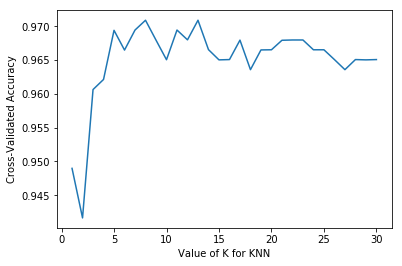

In [27]:
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [28]:
max_y = max(k_scores)  # Find the maximum y value
max_x = k_range[k_scores.index(max_y)]  # Find the x value corresponding to the maximum y value
print (max_x)
print (max_y)

8
0.9708866155157715


# Cross Validation: Best model

In [29]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=8)
print(cross_val_score(knn, df1, y, cv=10, scoring='accuracy').mean())

0.9708866155157715


In [30]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.9694373401534527


#  Testing out of sample data


In [31]:
#instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=7)

# train the model with X and y (not X_train and y_train)
knn.fit(df1, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [32]:
example = np .array([6, 4, 3, 5, 6, 5, 7, 2, 8])
example = example.reshape(1, -1)

prediction = knn.predict(example)
print(prediction)

[1.]


In [33]:
print(metrics.confusion_matrix(y_test, y_pred))

[[78  1]
 [ 5 53]]


# Metrics computed from a confusion matrix

In [34]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

Classification Accuracy: Overall, how often is the classifier correct?

In [35]:
print((TP + TN) / float(TP + TN + FP + FN))

0.9562043795620438


In [36]:
print(TP / float(TP + FP))

0.9814814814814815


In [37]:
knn.predict_proba(X_test)[0:10, :]

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.85714286, 0.14285714],
       [0.28571429, 0.71428571],
       [1.        , 0.        ]])

In [38]:
y_pred_prob = knn.predict_proba(X_test)[:, 1]

Text(0,0.5,'Frequency')

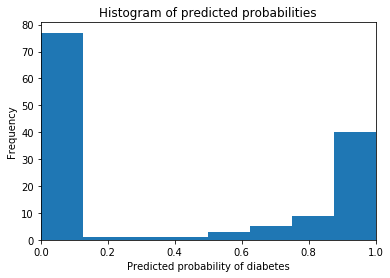

In [39]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')